# Model Analysis and Interpretation

This notebook analyzes model performance and interprets predictions.

In [1]:
import sys
sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib
from sklearn.metrics import roc_curve, precision_recall_curve
import shap

from src.utils.config import load_config
from src.utils.metrics import MetricsCalculator
sns.set_context('talk')

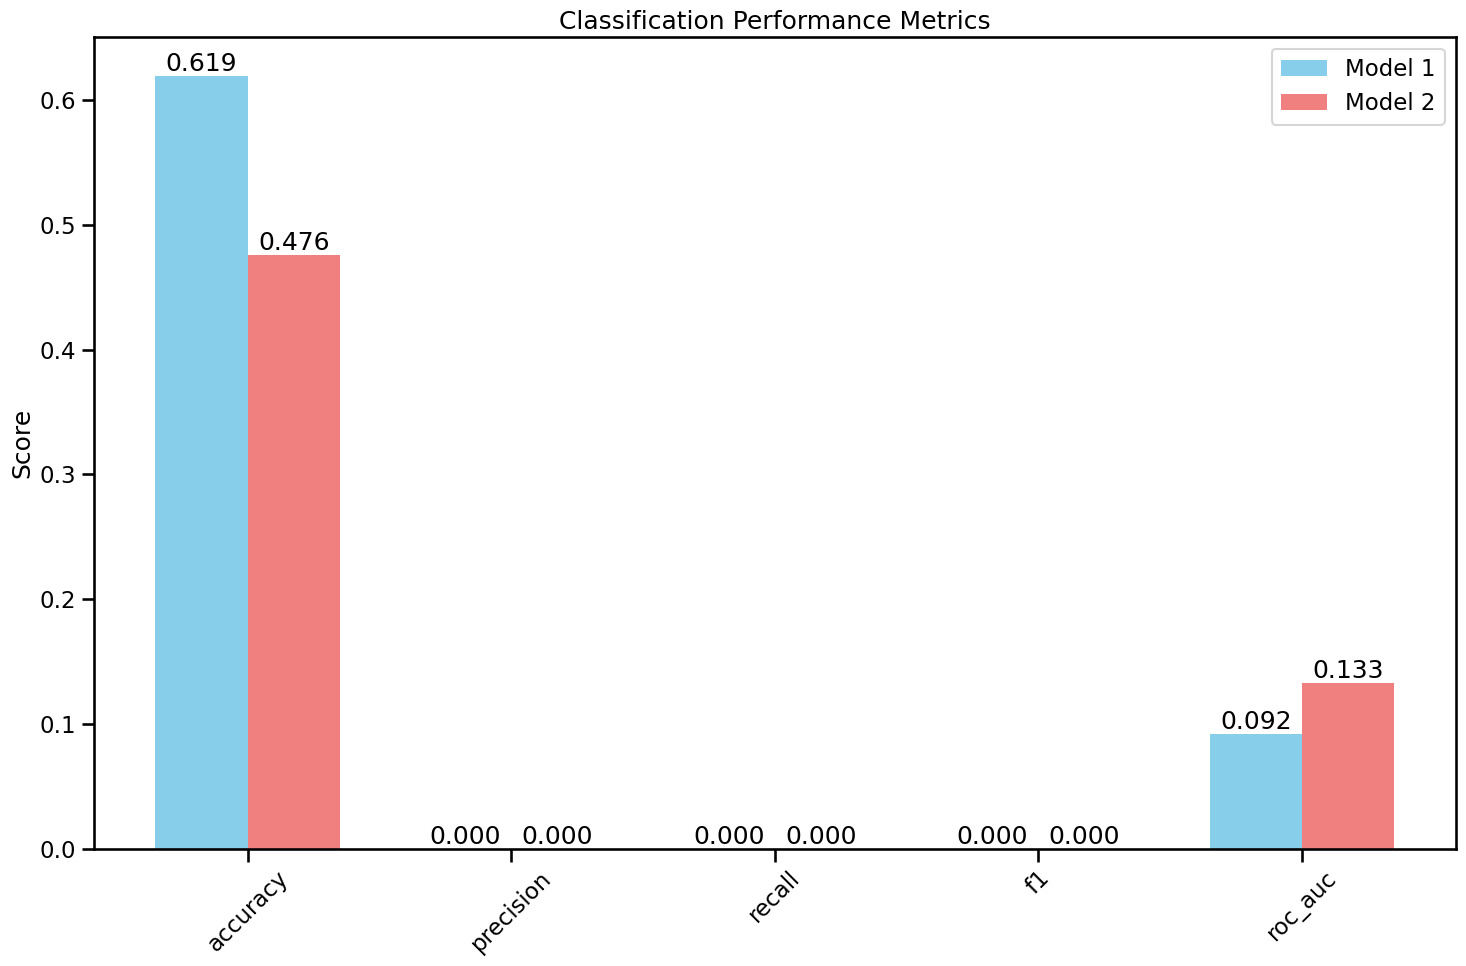

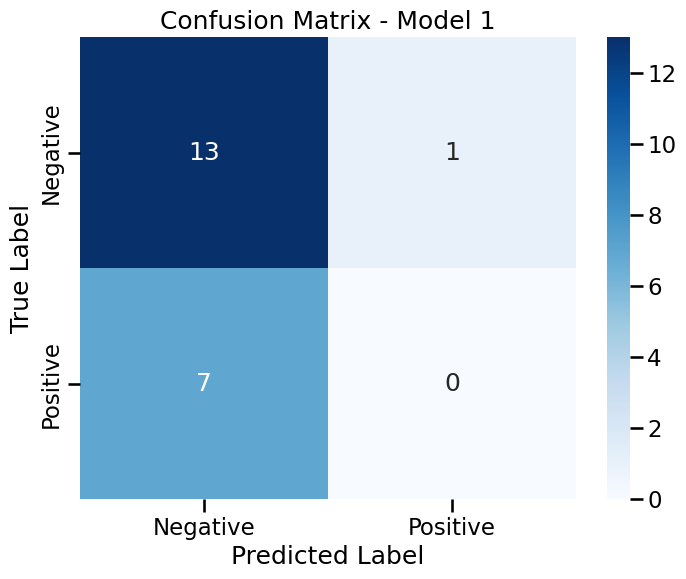

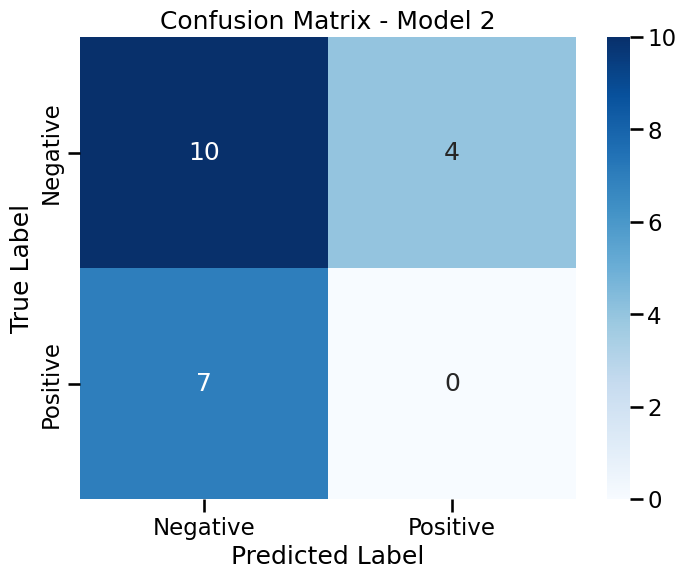

In [2]:
def visualize_classification_results(results_dict1, results_dict2=None):
    """
    Visualize classification results with optional comparison between two sets of results.
    
    Args:
        results_dict1 (dict): First set of results
        results_dict2 (dict, optional): Second set of results for comparison
    """
    # Define metrics to plot
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    # Create figure
    plt.figure(figsize=(15, 10))
    
    # Plot metrics comparison
    x = np.arange(len(metrics))
    width = 0.35
    
    values1 = [results_dict1[m] for m in metrics]
    rects1 = plt.bar(x - width/2 if results_dict2 else x, values1, width, 
                     label='Model 1', color='skyblue')
    
    if results_dict2:
        values2 = [results_dict2[m] for m in metrics]
        rects2 = plt.bar(x + width/2, values2, width, label='Model 2', color='lightcoral')
    
    plt.ylabel('Score')
    plt.title('Classification Performance Metrics')
    plt.xticks(x, metrics, rotation=45)
    plt.legend()
    
    # Add value labels on bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom')
    
    autolabel(rects1)
    if results_dict2:
        autolabel(rects2)
    
    plt.tight_layout()
    plt.show()
    
    # Create confusion matrix visualization
    def plot_confusion_matrix(tn, fp, fn, tp, title):
        cm = np.array([[tn, fp], [fn, tp]])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title(f'Confusion Matrix - {title}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    plot_confusion_matrix(
        results_dict1['true_negatives'],
        results_dict1['false_positives'],
        results_dict1['false_negatives'],
        results_dict1['true_positives'],
        'Model 1'
    )
    
    if results_dict2:
        plot_confusion_matrix(
            results_dict2['true_negatives'],
            results_dict2['false_positives'],
            results_dict2['false_negatives'],
            results_dict2['true_positives'],
            'Model 2'
        )

# Create example results dictionaries based on your data
results1 = {
    'accuracy': 0.619,
    'precision': 0.0,
    'recall': 0.0,
    'f1': 0.0,
    'roc_auc': 0.092,
    'true_negatives': 13,
    'false_positives': 1,
    'false_negatives': 7,
    'true_positives': 0
}

results2 = {
    'accuracy': 0.476,
    'precision': 0.0,
    'recall': 0.0,
    'f1': 0.0,
    'roc_auc': 0.133,
    'true_negatives': 10,
    'false_positives': 4,
    'false_negatives': 7,
    'true_positives': 0
}

# Visualize the results
visualize_classification_results(results1, results2)